## libraries

In [4]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functools import partial

## initial settings

In [5]:
num_classes = 10 #defined from datasets
epochs = 10
validation_size = 0.1

## define functions

### train test split

In [6]:
def splitData(dataset):
  (X_train, y_train), (X_test, y_test) = dataset.load_data()

  X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=validation_size)

  X_train = X_train.reshape(int(60000 * (1.0 - validation_size)), 28, 28, 1)
  X_test = X_test.reshape(10000, 28, 28, 1)
  X_valid = X_valid.reshape(int(60000 * validation_size), 28, 28, 1)

  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')
  X_valid = X_valid.astype('float32')

  X_train /= 255
  X_test /= 255
  X_valid /= 255

  # convert class vectors to binary class matrices
  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)
  y_valid = keras.utils.to_categorical(y_valid, num_classes)

  return X_train, y_train, X_test, y_test, X_valid, y_valid

### train model

In [7]:
def trainModel(model, X_train, y_train, X_valid, y_valid, optim='sgd'):
    model.compile(loss="categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"])
    
    #track epoch loss history
    history = model.fit(X_train, y_train, epochs=epochs,
                        validation_data=(X_valid, y_valid))
    
    return history

### plot loss over epochs

In [12]:
def pltHistory(history):
  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
  plt.title("Loss and Accuracy over Epochs")
  plt.xlabel('Epochs')
  plt.ylabel('Loss/Accuracy')
  plt.show()

### execute experiments for a given model and dataset

In [22]:
def doExperiment(model, dataset, plot_hist=True, optim='sgd'):
  X_train, y_train, X_test, y_test, X_valid, y_valid = splitData(dataset)
  # print("--- Training Model ...")
  history = trainModel(model, X_train, y_train, X_valid, y_valid)
  if plot_hist == True:
    print("\n\n ========= History =========")
    pltHistory(history)
  print("\n\n ========= Evaluation (Loss, Accuracy) ========= ")
  return model.evaluate(X_test, y_test)

## mlp

In [10]:
mlp_model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28, 1]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

### mnist dataset

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1018 - accuracy: 0.9707 - val_loss: 0.0945 - val_accuracy: 0.9738
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0898 - accuracy: 0.9746 - val_loss: 0.0939 - val_accuracy: 0.9735
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0840 - accuracy: 0.9768 - val_loss: 0.0873 - val_accuracy: 0.9750
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0758 - accuracy: 0.9791 - val_loss: 0.0849 - val_accuracy: 0.9755
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0683 - accuracy: 0.9815 - val_loss: 0.0873 - val_accuracy: 0.9740
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0640 - accuracy: 0.9824 - val_loss: 0.0790 - val_accuracy: 0.9762
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0618 - accuracy: 0.9830 - val_loss: 0.0761 - val_accuracy:

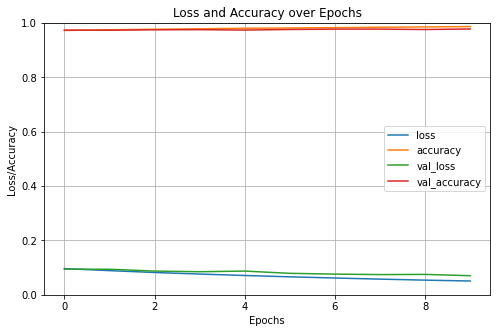



 ========= Evaluation (Loss, Accuracy) ========= 
313/313 [==============================] - 1s 2ms/step - loss: 0.0766 - accuracy: 0.9763


[0.07656044512987137, 0.9763000011444092]

In [13]:
doExperiment(mlp_model, mnist, plot_hist=True)

### fashion mnist

4423680/4422102 [==============================] - 0s 0us/step: 
Epoch 1/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.9534 - accuracy: 0.7255 - val_loss: 0.4855 - val_accuracy: 0.8370
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4532 - accuracy: 0.8394 - val_loss: 0.4604 - val_accuracy: 0.8280
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4075 - accuracy: 0.8582 - val_loss: 0.4100 - val_accuracy: 0.8585
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3750 - accuracy: 0.8656 - val_loss: 0.3729 - val_accuracy: 0.8735
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3560 - accuracy: 0.8723 - val_loss: 0.3628 - val_accuracy: 0.8780
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3418 - accuracy: 0.8782 - val_loss: 0.3555 - val_accuracy: 0.8757
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - l

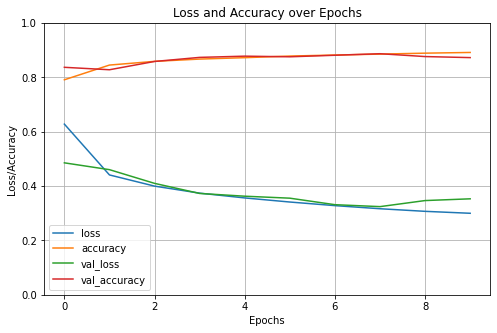



 ========= Evaluation (Loss, Accuracy) ========= 
313/313 [==============================] - 1s 3ms/step - loss: 0.3974 - accuracy: 0.8581


[0.39744359254837036, 0.8580999970436096]

In [14]:
doExperiment(mlp_model, fashion_mnist, plot_hist=True)

### experiments

#### number of layers (mnist dataset and relu activation)

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 1.0321 - accuracy: 0.7391 - val_loss: 0.3848 - val_accuracy: 0.8933
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3547 - accuracy: 0.9018 - val_loss: 0.3151 - val_accuracy: 0.9107
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3036 - accuracy: 0.9154 - val_loss: 0.2793 - val_accuracy: 0.9207
Epoch 4/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2660 - accuracy: 0.9268 - val_loss: 0.2551 - val_accuracy: 0.9275
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2447 - accuracy: 0.9327 - val_loss: 0.2346 - val_accuracy: 0.9332
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2186 - accuracy: 0.9400 - val_loss: 0.2187 - val_accuracy: 0.9372
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2092 - accuracy: 0.9418 - val_loss: 0.2047 - val_accuracy:

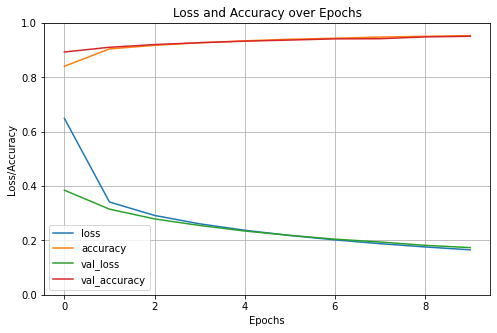



 ========= Evaluation (Loss, Accuracy) ========= 
313/313 [==============================] - 1s 2ms/step - loss: 0.1643 - accuracy: 0.9532


[0.16428984701633453, 0.9531999826431274]

In [15]:
# single layer
exp_mlp_model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28, 1]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

doExperiment(exp_mlp_model, mnist, plot_hist=True)

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 1.0228 - accuracy: 0.7276 - val_loss: 0.3451 - val_accuracy: 0.8983
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3102 - accuracy: 0.9113 - val_loss: 0.2796 - val_accuracy: 0.9153
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2468 - accuracy: 0.9301 - val_loss: 0.2476 - val_accuracy: 0.9233
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2077 - accuracy: 0.9420 - val_loss: 0.2131 - val_accuracy: 0.9353
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1811 - accuracy: 0.9482 - val_loss: 0.1918 - val_accuracy: 0.9415
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1603 - accuracy: 0.9549 - val_loss: 0.1744 - val_accuracy: 0.9458
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1405 - accuracy: 0.9603 - val_loss: 0.1597 - val_accuracy:

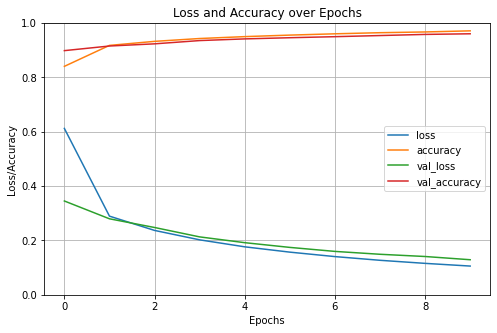



 ========= Evaluation (Loss, Accuracy) ========= 
313/313 [==============================] - 1s 2ms/step - loss: 0.1094 - accuracy: 0.9675


[0.10941637307405472, 0.9674999713897705]

In [16]:
# 2 layers
exp_mlp_model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28, 1]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

doExperiment(exp_mlp_model, mnist, plot_hist=True)

Epoch 1/10
1688/1688 [==============================] - 7s 4ms/step - loss: 1.0736 - accuracy: 0.7014 - val_loss: 0.2957 - val_accuracy: 0.9108
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2759 - accuracy: 0.9187 - val_loss: 0.2260 - val_accuracy: 0.9318
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2088 - accuracy: 0.9391 - val_loss: 0.1891 - val_accuracy: 0.9442
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1716 - accuracy: 0.9500 - val_loss: 0.1628 - val_accuracy: 0.9517
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1453 - accuracy: 0.9594 - val_loss: 0.1445 - val_accuracy: 0.9578
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1238 - accuracy: 0.9629 - val_loss: 0.1296 - val_accuracy: 0.9595
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1111 - accuracy: 0.9686 - val_loss: 0.1256 - val_accuracy:

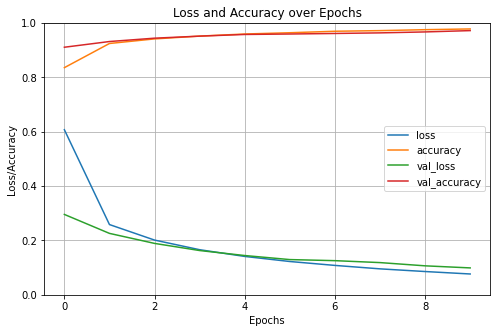



 ========= Evaluation (Loss, Accuracy) ========= 
313/313 [==============================] - 1s 2ms/step - loss: 0.0930 - accuracy: 0.9709


[0.09298780560493469, 0.9708999991416931]

In [17]:
# 3 layers
exp_mlp_model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28, 1]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

doExperiment(exp_mlp_model, mnist, plot_hist=True)

Epoch 1/10
1688/1688 [==============================] - 9s 5ms/step - loss: 1.2589 - accuracy: 0.6369 - val_loss: 0.2953 - val_accuracy: 0.9138
Epoch 2/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2686 - accuracy: 0.9200 - val_loss: 0.2243 - val_accuracy: 0.9283
Epoch 3/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1867 - accuracy: 0.9453 - val_loss: 0.1622 - val_accuracy: 0.9518
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1431 - accuracy: 0.9573 - val_loss: 0.1288 - val_accuracy: 0.9620
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1136 - accuracy: 0.9659 - val_loss: 0.1171 - val_accuracy: 0.9667
Epoch 6/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0954 - accuracy: 0.9714 - val_loss: 0.1070 - val_accuracy: 0.9687
Epoch 7/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0802 - accuracy: 0.9766 - val_loss: 0.1060 - val_accuracy:

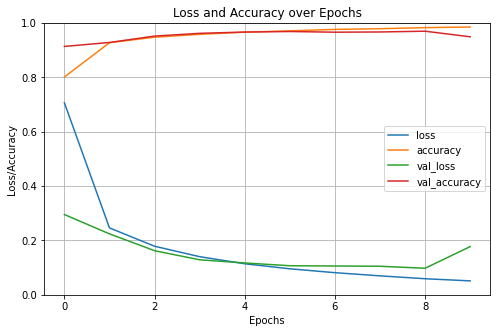



 ========= Evaluation (Loss, Accuracy) ========= 
313/313 [==============================] - 1s 2ms/step - loss: 0.1663 - accuracy: 0.9497


[0.1662842333316803, 0.9496999979019165]

In [19]:
# 5 layers
exp_mlp_model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28, 1]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

doExperiment(exp_mlp_model, mnist, plot_hist=True)

#### optimizers

In [24]:
# mnist
optims = ['sgd', 'Adam', 'RMSprop', 'Adamax']

for optim in optims:
    print('------- ', optim, ' -------')
    doExperiment(mlp_model, mnist, optim=optim, plot_hist=False)

-------  sgd  -------
Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0261 - accuracy: 0.9941 - val_loss: 0.0221 - val_accuracy: 0.9947
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0223 - accuracy: 0.9957 - val_loss: 0.0233 - val_accuracy: 0.9948
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0213 - accuracy: 0.9956 - val_loss: 0.0250 - val_accuracy: 0.9928
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0209 - accuracy: 0.9963 - val_loss: 0.0248 - val_accuracy: 0.9935
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0179 - accuracy: 0.9969 - val_loss: 0.0242 - val_accuracy: 0.9942
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0181 - accuracy: 0.9971 - val_loss: 0.0247 - val_accuracy: 0.9933
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0162 - accuracy: 0.9974 - val_loss: 

In [25]:
# fashion mnist
optims = ['sgd', 'Adam', 'RMSprop', 'Adamax']

for optim in optims:
    print('------- ', optim,    ' -------')
    doExperiment(mlp_model, fashion_mnist, optim=optim, plot_hist=False)

-------  sgd  -------
Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4711 - accuracy: 0.8562 - val_loss: 0.3509 - val_accuracy: 0.8758
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2960 - accuracy: 0.8910 - val_loss: 0.3317 - val_accuracy: 0.8797
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2917 - accuracy: 0.8911 - val_loss: 0.3214 - val_accuracy: 0.8827
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2754 - accuracy: 0.8996 - val_loss: 0.3208 - val_accuracy: 0.8832
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2660 - accuracy: 0.9035 - val_loss: 0.3036 - val_accuracy: 0.8888
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2610 - accuracy: 0.9073 - val_loss: 0.2949 - val_accuracy: 0.8915
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2512 - accuracy: 0.9085 - val_loss: 

#### activation

In [26]:
activations = ['relu', 'sigmoid', 'softmax', 'tanh', 'exponential']

for activ in activations:
    print('------- ', activ, ' -------')
    activ_mlp_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28, 1]),
    keras.layers.Dense(300, activation=activ),
    keras.layers.Dense(100, activation=activ),
    keras.layers.Dense(10, activation="softmax")
    ])

    doExperiment(activ_mlp_model, mnist, plot_hist=False)

-------  relu  -------
Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.9890 - accuracy: 0.7503 - val_loss: 0.3419 - val_accuracy: 0.8985
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3000 - accuracy: 0.9140 - val_loss: 0.2660 - val_accuracy: 0.9205
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2435 - accuracy: 0.9316 - val_loss: 0.2317 - val_accuracy: 0.9318
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2053 - accuracy: 0.9417 - val_loss: 0.2045 - val_accuracy: 0.9372
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1741 - accuracy: 0.9498 - val_loss: 0.1850 - val_accuracy: 0.9428
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1565 - accuracy: 0.9563 - val_loss: 0.1691 - val_accuracy: 0.9477
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1369 - accuracy: 0.9617 - val_loss:

#### initializers

In [27]:
initializers = ['RandomNormal', 'RandomUniform', 'Zeros', 'Ones']

for init in initializers:
    print('------- ', init, ' -------')
    init_mlp_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28, 1]),
    keras.layers.Dense(300, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'),
    keras.layers.Dense(100, activation='relu', kernel_initializer='random_normal'),
    keras.layers.Dense(10, activation="softmax")
    ])

    doExperiment(init_mlp_model, mnist, plot_hist=False)

-------  RandomNormal  -------
Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 1.1236 - accuracy: 0.7101 - val_loss: 0.3345 - val_accuracy: 0.9048
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3261 - accuracy: 0.9089 - val_loss: 0.2707 - val_accuracy: 0.9233
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2617 - accuracy: 0.9256 - val_loss: 0.2357 - val_accuracy: 0.9312
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2353 - accuracy: 0.9347 - val_loss: 0.2073 - val_accuracy: 0.9405
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1998 - accuracy: 0.9435 - val_loss: 0.1813 - val_accuracy: 0.9482
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1740 - accuracy: 0.9501 - val_loss: 0.1672 - val_accuracy: 0.9507
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1621 - accuracy: 0.9542 - v

## cnn 

In [28]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

cnn_model = keras.models.Sequential([
DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
keras.layers.MaxPooling2D(pool_size=2),
DefaultConv2D(filters=128),
DefaultConv2D(filters=128),
keras.layers.MaxPooling2D(pool_size=2),
DefaultConv2D(filters=256),
DefaultConv2D(filters=256),
keras.layers.MaxPooling2D(pool_size=2),
keras.layers.Flatten(),
keras.layers.Dense(units=128, activation='relu'),
keras.layers.Dropout(0.5),
keras.layers.Dense(units=64, activation='relu'),
keras.layers.Dropout(0.5),
keras.layers.Dense(units=10, activation='softmax'),
])

### mnist

Epoch 1/10
1688/1688 [==============================] - 67s 39ms/step - loss: 1.9076 - accuracy: 0.3108 - val_loss: 0.1961 - val_accuracy: 0.9412
Epoch 2/10
1688/1688 [==============================] - 64s 38ms/step - loss: 0.3688 - accuracy: 0.8948 - val_loss: 0.0988 - val_accuracy: 0.9720
Epoch 3/10
1688/1688 [==============================] - 64s 38ms/step - loss: 0.2170 - accuracy: 0.9410 - val_loss: 0.0790 - val_accuracy: 0.9772
Epoch 4/10
1688/1688 [==============================] - 64s 38ms/step - loss: 0.1615 - accuracy: 0.9585 - val_loss: 0.0658 - val_accuracy: 0.9823
Epoch 5/10
1688/1688 [==============================] - 65s 39ms/step - loss: 0.1277 - accuracy: 0.9665 - val_loss: 0.0577 - val_accuracy: 0.9848
Epoch 6/10
1688/1688 [==============================] - 65s 38ms/step - loss: 0.1180 - accuracy: 0.9709 - val_loss: 0.0443 - val_accuracy: 0.9872
Epoch 7/10
1688/1688 [==============================] - 62s 37ms/step - loss: 0.0931 - accuracy: 0.9759 - val_loss: 0.0463 -

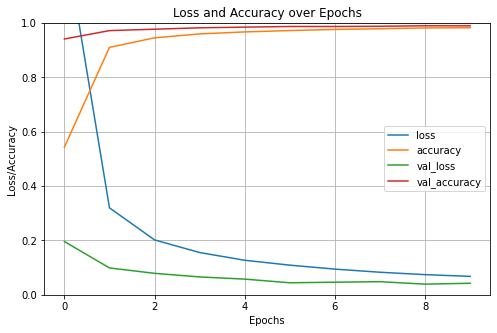



 ========= Evaluation (Loss, Accuracy) ========= 
313/313 [==============================] - 3s 10ms/step - loss: 0.0345 - accuracy: 0.9910


[0.03446878865361214, 0.9909999966621399]

In [29]:
doExperiment(cnn_model, mnist)

### fashion mnist

Epoch 1/10
1688/1688 [==============================] - 66s 39ms/step - loss: 1.0927 - accuracy: 0.6403 - val_loss: 0.4453 - val_accuracy: 0.8402
Epoch 2/10
1688/1688 [==============================] - 65s 39ms/step - loss: 0.5586 - accuracy: 0.8151 - val_loss: 0.3797 - val_accuracy: 0.8658
Epoch 3/10
1688/1688 [==============================] - 66s 39ms/step - loss: 0.4677 - accuracy: 0.8451 - val_loss: 0.3477 - val_accuracy: 0.8760
Epoch 4/10
1688/1688 [==============================] - 65s 38ms/step - loss: 0.4273 - accuracy: 0.8588 - val_loss: 0.3337 - val_accuracy: 0.8838
Epoch 5/10
1688/1688 [==============================] - 65s 39ms/step - loss: 0.3854 - accuracy: 0.8722 - val_loss: 0.3171 - val_accuracy: 0.8840
Epoch 6/10
1688/1688 [==============================] - 61s 36ms/step - loss: 0.3740 - accuracy: 0.8766 - val_loss: 0.3139 - val_accuracy: 0.8860
Epoch 7/10
1688/1688 [==============================] - 62s 37ms/step - loss: 0.3520 - accuracy: 0.8828 - val_loss: 0.2887 -

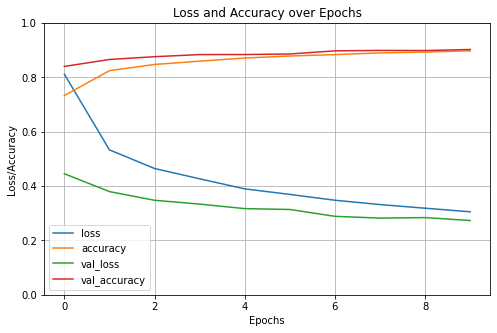



 ========= Evaluation (Loss, Accuracy) ========= 
313/313 [==============================] - 3s 11ms/step - loss: 0.2853 - accuracy: 0.8987


[0.28525426983833313, 0.8986999988555908]

In [30]:
doExperiment(cnn_model, fashion_mnist)